In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark1
from pytamp.action.place import PlaceAction
%matplotlib inline

In [2]:
def linearplot_with_confidence(x_list, mean_list, std_list, label, marker="", color='r'):
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

In [11]:
def get_final_all_values(algo, budgets, n_seed, obj_num, end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 


    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark1_rearr_result/benchmark1_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj({obj_num})_flag(2)_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    result_all_values["c"] = c_list

    return result_all_values 

In [12]:
def plot_values(values, labels=None, title="test"):
    _, ax = p_utils.init_2d_figure(title)
    if labels.size > 1:
        for value, label in zip(values, labels):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)  
    else:
        for label, value in enumerate(values):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)
    # plt.ylim([np.min(values),np.max(values)])

In [13]:
def get_mean_std_values(result_all_values, level=1):
    if level == 1:
        key_name = "level_1_values"
    if level == 2:
        key_name = "level_2_values"
    mean_values = np.mean(result_all_values[key_name], axis=0)
    # mean_values = np.ma.masked_invalid(result_all_values[key_name]).mean(axis=0)
    std_values = np.std(result_all_values[key_name], axis=0)
    return mean_values, std_values

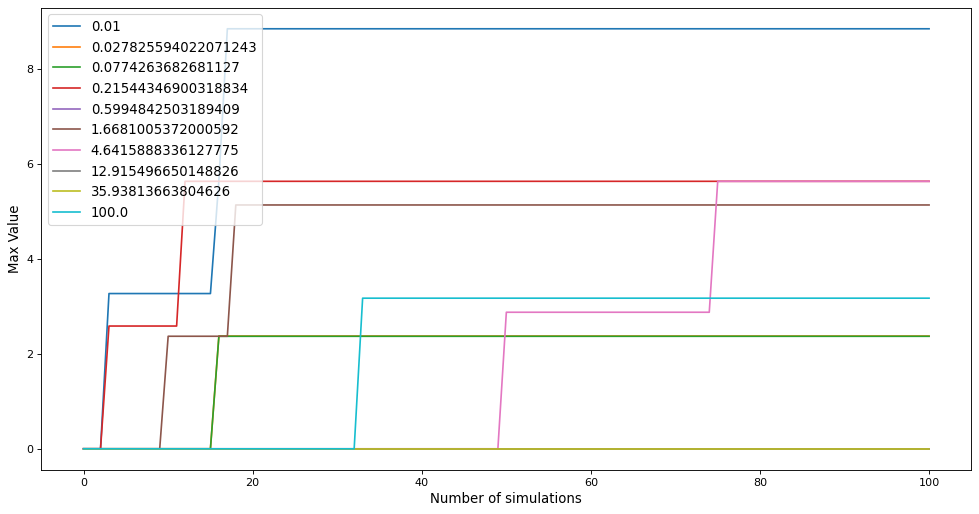

In [23]:
bai_perturb_result_all_values = get_final_all_values("bai_perturb", 100, 6 ,6, 0)
perturb_mean_level_1_values, perturb_std_level_1_values = get_mean_std_values(bai_perturb_result_all_values, level=1)
perturb_mean_level_2_values, perturb_std_level_2_values = get_mean_std_values(bai_perturb_result_all_values, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values['c'])
plot_values(perturb_mean_level_2_values, labels=bai_perturb_result_all_values['c'])

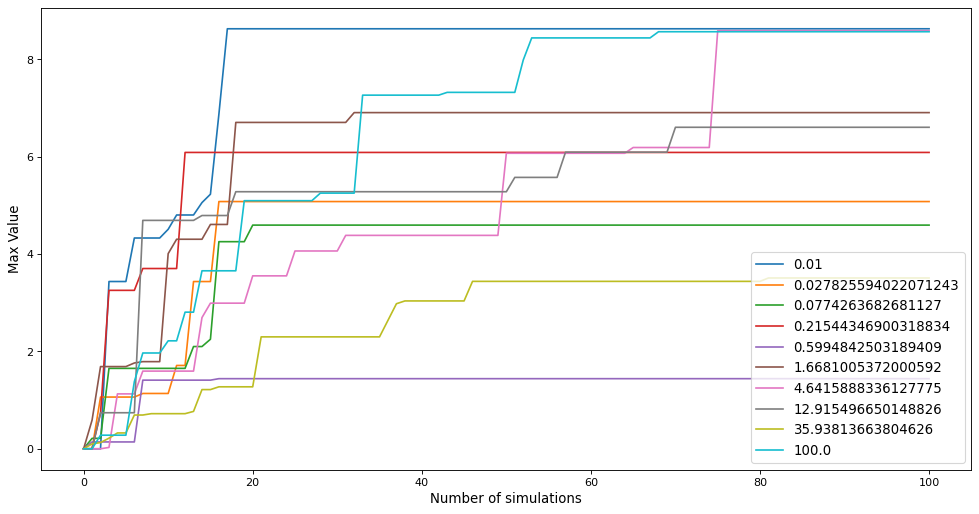

In [24]:
plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values['c'])

8.630026455026458
17


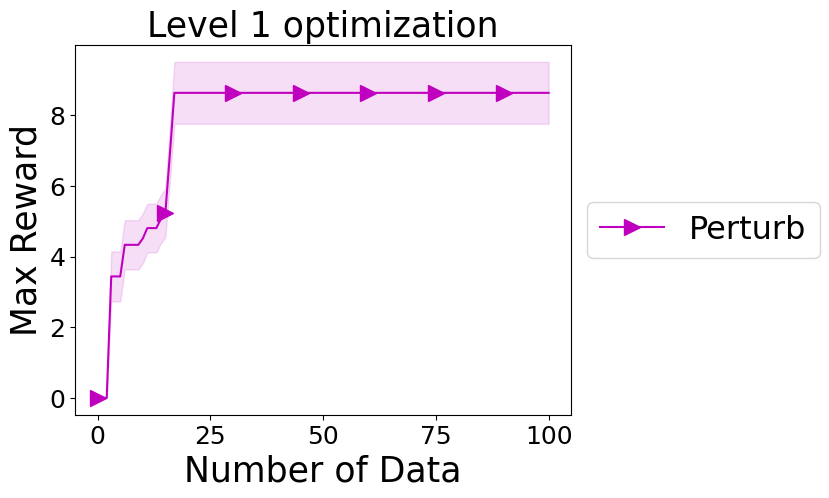

In [25]:
max_perturb_idx = np.argmax(perturb_mean_level_1_values[:, -1])
perturb_level_1_mean_list = perturb_mean_level_1_values[max_perturb_idx]
perturb_level_1_std_list = perturb_std_level_1_values[max_perturb_idx]

# max_uct_idx = np.argmax(uct_mean_level_1_values[:, -1])
# uct_level_1_mean_list = uct_mean_level_1_values[max_uct_idx]
# uct_level_1_std_list = uct_std_level_1_values[max_uct_idx]


# max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_1_values[:, -1])
# bai_ucb_level_1_mean_list = bai_ucb_mean_level_1_values[max_bai_ucb_idx]
# bai_ucb_level_1_std_list = bai_ucb_std_level_1_values[max_bai_ucb_idx]

# max_random_idx = np.argmax(random_mean_level_1_values[:, -1])
# print(max_random_idx)
# random_level_1_mean_list = random_mean_level_1_values[max_random_idx]
# random_level_1_std_list = random_std_level_1_values[max_random_idx]

x_list = np.arange(len(perturb_level_1_mean_list))

linearplot_with_confidence(x_list, perturb_level_1_mean_list, perturb_level_1_std_list, "Perturb", ">", "m")
# linearplot_with_confidence(x_list, uct_level_1_mean_list, uct_level_1_std_list, "uct", "v", "c")
# linearplot_with_confidence(x_list, bai_ucb_level_1_mean_list, bai_ucb_level_1_std_list, "bai_ucb", "o", "g")
# linearplot_with_confidence(x_list, random_level_1_mean_list, random_level_1_std_list, "random", "^", "r")

print(perturb_mean_level_1_values[max_perturb_idx][-1])
# print(uct_mean_level_1_values[max_uct_idx][-1])
# print(bai_ucb_mean_level_1_values[max_bai_ucb_idx][-1])
# print(random_mean_level_1_values[max_random_idx][-1])

print(np.argmax(perturb_level_1_mean_list))
# print(np.argmax(bai_ucb_level_1_mean_list))

plt.title("Level 1 optimization", fontsize=25)
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Max Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

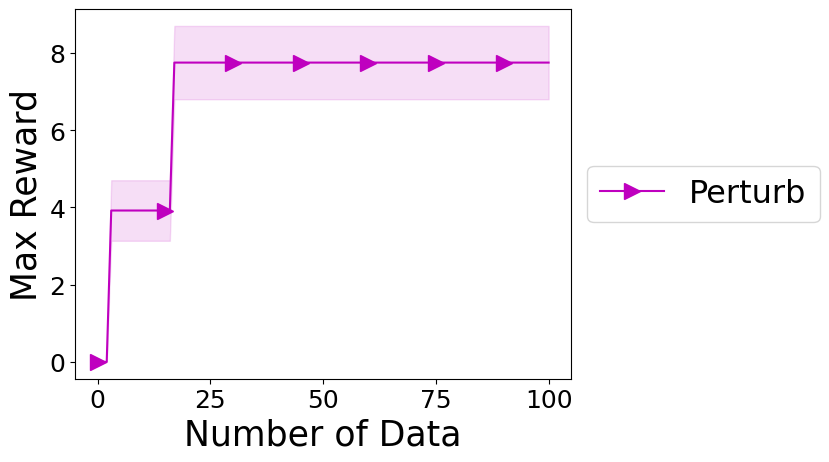

In [17]:
max_perturb_idx = np.argmax(perturb_mean_level_2_values[:, -1])
perturb_level_2_mean_list = perturb_mean_level_2_values[max_perturb_idx]
perturb_level_2_std_list = perturb_std_level_2_values[max_perturb_idx]

# max_uct_idx = np.argmax(uct_mean_level_2_values[:, -1])
# uct_level_2_mean_list = uct_mean_level_2_values[max_uct_idx]
# uct_level_2_std_list = uct_std_level_2_values[max_uct_idx]

# max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_2_values[:, -1])
# bai_ucb_level_2_mean_list = bai_ucb_mean_level_2_values[max_bai_ucb_idx]
# bai_ucb_level_2_std_list = bai_ucb_std_level_2_values[max_bai_ucb_idx]

# max_random_idx = np.argmax(random_mean_level_2_values[:, -1])
# random_level_2_mean_list = random_mean_level_2_values[max_random_idx]
# random_level_2_std_list = random_std_level_2_values[max_random_idx]

x_list = np.arange(len(perturb_level_2_mean_list))

linearplot_with_confidence(x_list, perturb_level_2_mean_list, perturb_level_2_std_list, "Perturb", ">", "m")
# linearplot_with_confidence(x_list, uct_level_2_mean_list, uct_level_2_std_list, "uct", "v", "c")
# linearplot_with_confidence(x_list, bai_ucb_level_2_mean_list, bai_ucb_level_2_std_list, "bai_ucb", "o", "g")
# linearplot_with_confidence(x_list, random_level_2_mean_list, random_level_2_std_list, "random", "^", "r")

plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Max Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

# time consuming check 

In [26]:
bai_perturb_result_all_values['used_time']

[array([list([2.188209056854248, 7.586703538894653, 43.60003709793091]),
        list([]),
        list([1.3478963375091553, 3.565438985824585, 48.422627449035645]),
        list([2.2641046047210693, 3.075439929962158, 44.27367544174194]),
        list([]), list([]),
        list([5.560352802276611, 5.288025379180908, 43.26644968986511]),
        list([]), list([]), list([])], dtype=object),
 array([list([]), list([]), list([]),
        list([1.7074072360992432, 3.996903657913208, 58.67221236228943]),
        list([]),
        list([1.9137051105499268, 3.295983076095581, 43.5984148979187]),
        list([]), list([]), list([]), list([])], dtype=object),
 array([], shape=(10, 0), dtype=float64),
 array([list([1.9297316074371338, 8.663384914398193, 44.57808327674866]),
        list([1.313246726989746, 5.09857439994812, 49.47409152984619]),
        list([]), list([]), list([]),
        list([1.112846851348877, 3.416245460510254, 49.308706283569336]),
        list([]), list([]), list([]), 

In [27]:
bai_perturb_result_all_values['visted_node_num']

[array([list([17]), list([]), list([19]), list([17]), list([]), list([]),
        list([131]), list([]), list([]), list([])], dtype=object),
 array([list([]), list([]), list([]), list([21]), list([]), list([17]),
        list([]), list([]), list([]), list([])], dtype=object),
 array([], shape=(10, 0), dtype=float64),
 array([list([17]), list([19]), list([]), list([]), list([]), list([19]),
        list([]), list([]), list([]), list([])], dtype=object),
 array([list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([119])], dtype=object),
 array([list([19]), list([]), list([]), list([]), list([]), list([]),
        list([137]), list([]), list([]), list([])], dtype=object)]

In [38]:
bai_perturb_idx = np.unravel_index(bai_perturb_result_all_values['level_2_values'].argmax(), bai_perturb_result_all_values['level_2_values'].shape)
pnp_all_joint_path = bai_perturb_result_all_values['pnp_all_joint_paths'][bai_perturb_idx[0]][bai_perturb_idx[1]]
pick_all_objects = bai_perturb_result_all_values['pick_all_objects'][bai_perturb_idx[0]][bai_perturb_idx[1]]
place_all_object_poses = bai_perturb_result_all_values['place_all_object_poses'][bai_perturb_idx[0]][bai_perturb_idx[1]]

# uct_idx = np.unravel_index(uct_result_all_values['level_2_values'].argmax(), uct_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = uct_result_all_values['pnp_all_joint_paths'][uct_idx[0]][uct_idx[1]]
# pick_all_objects = uct_result_all_values['pick_all_objects'][uct_idx[0]][uct_idx[1]]
# place_all_object_poses = uct_result_all_values['place_all_object_poses'][uct_idx[0]][uct_idx[1]]

# bai_ucb_idx = np.unravel_index(bai_ucb_result_all_values['level_2_values'].argmax(), bai_ucb_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = bai_ucb_result_all_values['pnp_all_joint_paths'][bai_ucb_idx[0]][bai_ucb_idx[1]]
# pick_all_objects = bai_ucb_result_all_values['pick_all_objects'][bai_ucb_idx[0]][bai_ucb_idx[1]]
# place_all_object_poses = bai_ucb_result_all_values['place_all_object_poses'][bai_ucb_idx[0]][bai_ucb_idx[1]]

# random_idx = np.unravel_index(random_result_all_values['level_2_values'].argmax(), random_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = random_result_all_values['pnp_all_joint_paths'][random_idx[0]][random_idx[1]]
# pick_all_objects = random_result_all_values['pick_all_objects'][random_idx[0]][random_idx[1]]
# place_all_object_poses = random_result_all_values['place_all_object_poses'][random_idx[0]][random_idx[1]]

[[OrderedDict([('pre_grasp',
                [array([-9.69645444e-03,  2.30636475e-01,  1.15546654e-03, -2.53907088e+00,
                        -8.16394484e-03,  2.90235778e+00, -7.98521388e-01]),
                 array([-1.93929089e-02,  2.64923409e-01,  2.31093308e-03, -2.46014788e+00,
                        -1.63278897e-02,  2.86312292e+00, -8.11644613e-01]),
                 array([-0.02908936,  0.29921034,  0.0034664 , -2.38122487, -0.02449183,
                         2.82388805, -0.82476784]),
                 array([-0.03878582,  0.33349728,  0.00462187, -2.30230187, -0.03265578,
                         2.78465318, -0.83789106]),
                 array([-0.04848227,  0.36778421,  0.00577733, -2.22337887, -0.04081972,
                         2.74541831, -0.85101429]),
                 array([-0.05817873,  0.40207114,  0.0069328 , -2.14445587, -0.04898367,
                         2.70618344, -0.86413751]),
                 array([-0.06787518,  0.43635808,  0.00808827, -2.065

In [14]:
pwd

'/home/juju/pytamp/results/benchmark1'